# Q1.

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [52]:
df = pd.read_csv('car_sample.csv', encoding = "ISO-8859-1")

In [53]:
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,30/03/2016 13:51,Zu_verkaufen,private,offer,4450,test,limousine,2003,manual,150,3er,150000,3,diesel,bmw,NaN,30/03/2016 0:00,20257,7/4/2016 4:44
1,7/3/2016 9:54,Volvo_XC90_2.4D_Summum,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,no,7/3/2016 0:00,88045,26/03/2016 13:17
2,1/4/2016 0:57,Volkswagen_Touran,private,offer,3200,test,bus,2003,manual,101,touran,150000,11,diesel,volkswagen,NaN,31/03/2016 0:00,27449,1/4/2016 8:40
3,19/03/2016 17:50,Seat_Ibiza_1.4_16V_Reference,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,12,petrol,seat,no,19/03/2016 0:00,34537,7/4/2016 4:44
4,16/03/2016 14:51,Volvo_XC90_D5_Aut._RDesign_R_Design_AWD_GSHD_S...,private,offer,18750,test,suv,2008,automatic,185,xc_reihe,150000,11,diesel,volvo,no,16/03/2016 0:00,55270,1/4/2016 23:18


In [54]:
cols = ['dateCrawled', 'name', 'dateCreated', 'lastSeen']
df.drop(columns=cols, inplace=True)
df.head()

,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,postalCode
0,private,offer,4450,test,limousine,2003,manual,150,3er,150000,3,diesel,bmw,NaN,20257
1,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,no,88045
2,private,offer,3200,test,bus,2003,manual,101,touran,150000,11,diesel,volkswagen,NaN,27449
3,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,12,petrol,seat,no,34537
4,private,offer,18750,test,suv,2008,automatic,185,xc_reihe,150000,11,diesel,volvo,no,55270


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   seller               50001 non-null  object
 1   offerType            50001 non-null  object
 2   price                50001 non-null  int64 
 3   abtest               50001 non-null  object
 4   vehicleType          44813 non-null  object
 5   yearOfRegistration   50001 non-null  int64 
 6   gearbox              47177 non-null  object
 7   powerPS              50001 non-null  int64 
 8   model                47243 non-null  object
 9   kilometer            50001 non-null  int64 
 10  monthOfRegistration  50001 non-null  int64 
 11  fuelType             45498 non-null  object
 12  brand                50001 non-null  object
 13  notRepairedDamage    40285 non-null  object
 14  postalCode           50001 non-null  int64 
dtypes: int64(6), object(9)
memory usage: 5.7+ MB


In [56]:
for col in df.columns:
    print(col)
    print(df[col].value_counts())
    print()

seller
private       49999
commercial        2
Name: seller, dtype: int64

offerType
offer      49998
request        3
Name: offerType, dtype: int64

price
0        1451
500       742
1500      705
1000      647
2500      594
         ... 
18181       1
955         1
2970        1
40830       1
15880       1
Name: price, Length: 2393, dtype: int64

abtest
test       25869
control    24132
Name: abtest, dtype: int64

vehicleType
limousine        13041
small car        10744
station wagon     8990
bus               3995
cabrio            3056
coupe             2536
suv               2011
others             440
Name: vehicleType, dtype: int64

yearOfRegistration
2000    3315
2005    3131
1999    3055
2001    2804
2003    2756
        ... 
1934       1
1933       1
1928       1
3500       1
1941       1
Name: yearOfRegistration, Length: 97, dtype: int64

gearbox
manual       36732
automatic    10445
Name: gearbox, dtype: int64

powerPS
0        5605
75       3264
60       2167
150      205

In [57]:
cols = ['seller', 'offerType', 'notRepairedDamage']
df.drop(columns=cols, inplace=True)
df.head()

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,postalCode
0,4450,test,limousine,2003,manual,150,3er,150000,3,diesel,bmw,20257
1,13299,control,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,88045
2,3200,test,bus,2003,manual,101,touran,150000,11,diesel,volkswagen,27449
3,4500,control,small car,2006,manual,86,ibiza,60000,12,petrol,seat,34537
4,18750,test,suv,2008,automatic,185,xc_reihe,150000,11,diesel,volvo,55270


In [58]:
cols = ['abtest', 'vehicleType', 'gearbox', 'model', 'fuelType', 'brand']

for col in cols:
    le = preprocessing.LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
df.head()

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,postalCode
0,4450,1,3,2003,1,150,11,150000,3,1,2,20257
1,13299,0,8,2005,1,163,243,150000,6,1,39,88045
2,3200,1,0,2003,1,101,221,150000,11,1,38,27449
3,4500,0,6,2006,1,86,120,60000,12,7,30,34537
4,18750,1,8,2008,0,185,243,150000,11,1,39,55270


In [59]:
df.shape

(50001, 12)

In [60]:
df.corr()

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,postalCode
price,1.000000,0.002790,-0.011208,0.017604,-0.018165,0.020429,-0.002403,-0.045458,0.000582,-0.013127,-0.007697,0.005916
abtest,0.002790,1.000000,0.005034,0.003324,-0.003996,0.001375,-0.001415,-0.003027,0.000621,0.004686,0.006246,0.003096
vehicleType,-0.011208,0.005034,1.000000,0.000573,-0.000225,-0.035590,-0.037315,0.020446,0.006124,-0.035184,0.012066,-0.013254
yearOfRegistration,0.017604,0.003324,0.000573,1.000000,0.029205,-0.004394,0.008299,-0.064188,-0.023152,-0.012598,0.004461,-0.001615
gearbox,-0.018165,-0.003996,-0.000225,0.029205,1.000000,-0.142459,0.046735,0.005481,-0.123792,0.126904,0.120576,0.003200
powerPS,0.020429,0.001375,-0.035590,-0.004394,-0.142459,1.000000,-0.035191,-0.016447,0.034345,-0.044093,-0.083801,0.017415
model,-0.002403,-0.001415,-0.037315,0.008299,0.046735,-0.035191,1.000000,-0.043010,-0.028372,-0.034566,0.435585,-0.051870
kilometer,-0.045458,-0.003027,0.020446,-0.064188,0.005481,-0.016447,-0.043010,1.000000,0.001985,-0.104424,-0.031284,-0.024076
monthOfRegistration,0.000582,0.000621,0.006124,-0.023152,-0.123792,0.034345,-0.028372,0.001985,1.000000,-0.062377,-0.018635,0.019050
fuelType,-0.013127,0.004686,-0.035184,-0.012598,0.126904,-0.044093,-0.034566,-0.104424,-0.062377,1.000000,0.038798,-0.014061


# Q2.

In [61]:
cols = ['abtest', 'model', 'monthOfRegistration', 'brand', 'postalCode']
df.drop(columns=cols, inplace=True)
df.head()

,price,vehicleType,yearOfRegistration,gearbox,powerPS,kilometer,fuelType
0,4450,3,2003,1,150,150000,1
1,13299,8,2005,1,163,150000,1
2,3200,0,2003,1,101,150000,1
3,4500,6,2006,1,86,60000,7
4,18750,8,2008,0,185,150000,1


# Q3.

In [63]:
cor = df.corr()

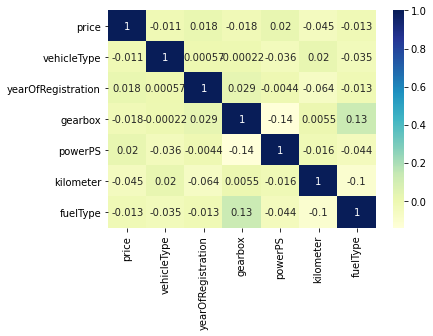

In [71]:
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

In [70]:
print(cor['price'])
print('Highest: kilometer (abs vale of 0.045458)')

price                 1.000000
vehicleType          -0.011208
yearOfRegistration    0.017604
gearbox              -0.018165
powerPS               0.020429
kilometer            -0.045458
fuelType             -0.013127
Name: price, dtype: float64
Highest: kilometer (abs vale of 0.045458)


# Q4.

In [75]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(columns = ['price']), df['price'], test_size = 0.2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((40000, 6), (40000,), (10001, 6), (10001,))

In [93]:
algo = "Linear Regression\n"
model = LinearRegression()
model.fit(x_train, y_train)
print(algo)


print('Training error')
y_pred = model.predict(x_train)
e = (y_pred - y_train)
e = e.dot(e)
e /= y_test.shape[0]
e = e**0.5
print(e)

print('Testing error')
y_pred = model.predict(x_test)
e = (y_pred - y_test)
e = e.dot(e)
e /= y_test.shape[0]
e = e**0.5
print(e)

Linear Regression

Training error
189127.72277489284
Testing error
30656.97146180956
